<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQIbM9xMoM7XWvpmPRPtAsMnIyVLvlaWopGF7k4GtYNBTL1Uj7OfMktStIUKlsRKYgcmg&usqp=CAU"></img>

# Analysis of OCPSAllDataLeaderView.csv

### Privacy Disclaimer

 This Jupyter Notebook contains sensitive and confidential information that includes data protected under Florida's Sunshine Laws. Unauthorized disclosure, distribution, or copying of this data is strictly prohibited. **This document is intended solely for the use of the authorized recipient(s) and is not for public disclosure.**

If you are not the intended recipient, please notify the sender immediately, delete this notebook from your system, and do not disclose its contents to any other person, use it for any purpose, or store or copy any of the information contained herein.

By accessing and using this notebook, you agree to comply with all applicable confidentiality and data protection laws and policies.


### Attributions
(C) Dariel Cruz Rodriguez, 2024, under work for Orange County Public Schools.



---

### Code


In [41]:
# Modules utilized in this code
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
# Defining data sources
url = "https://raw.githubusercontent.com/cruzdariel/OCPSAllDataLeaderView2024/colab/OrangeCountyPublicSchoolsAllDataLeadershipView10Jun2024.csv?token=GHSAT0AAAAAACTX3ZR4NKTFUZGHPHLR7HW4ZTRZPTQ"

df = pd.read_csv(url) # All schools
df = df[~df['Name'].isin([
    "OCVS VIRTUAL INSTRUCTION COURSE OFFERING",
    "ORANGE CENTER ELEMENTARY",
    "TIMBER LAKES ELEMENTARY",
    "ACCESS AND OPPORTUNITY",
    "ACCOUNTS PAYABLE",
    "CURRICULUM & DIGITAL LEARNING",
    "CURRICULUM AND INSTRUCTION",
    "CUSTODIAL SERVICES",
    "DISTRICT POLICE and PROTECTIVE SERVICES",
    "ELEMENTARY SCHOOLS",
    "EMPLOYMENT SERVICES",
    "ENVIRONMENTAL COMPLIANCE AND SUSTAINABIL",
    "ESE INSTRUCTIONAL SUPPORT",
    "ESE POL & PRO & SUP SVC NONPUB",
    "ESE POL & PROCEDURES PUB K12",
    "ESE SPEC PROG & BEHAVIOR SUPP",
    "ESE SUPPLEMENTAL SERVICES",
    "FACILITIES SERVICES CONSTRUCTION",
    "FACILITIES SVC MAINTENANCE and FACILITIE",
    "FEDERAL PROGRAMS",
    "FINANCE",
    "FOOD AND NUTRITION SERVICES",
    "GROUNDS LANDSCAPING AND PEST CONTROL SVC",
    "HR COMPLIANCE",
    "ITS CUSTOMER CARE",
    "ITS ENTERPRISE PROJECTS",
    "ITS INFRASTRUCTURE",
    "MAINTENANCE NORTHEAST",
    "MAINTENANCE NORTHWEST",
    "MAINTENANCE SOUTH",
    "MULTILINGUAL SERVICES",
    "OFFICE OF MANAGEMENT AND BUDGET",
    "PAYROLL SERVICES",
    "PROCUREMENT SVCS AND FAC CONST CONTRACT",
    "PROFESSIONAL LEARNING",
    "PROFESSIONAL STANDARDS",
    "PSYCHOLOGICAL & SOCIAL SERVICES",
    "PUBLIC RELATIONS",
    "RESEARCH, MEASUREMENT AND STRATEGY",
    "RISK MANAGEMENT",
    "SCHOOL CHOICE SERVICES",
    "SCHOOL TRANSFORMATION OFFICE",
    "STUDENT ENROLLMENT",
    "STUDENT INFORMATION SYSTEMS AND PROJECTS",
    "STUDENT SERVICES",
    "TRANSPORTATION ADMINISTRATION",
    "TRANSPORTATION STUDENT SVCS",
    "TRANSPORTATION SUPPORT SERVICES",
    "VOCATIONAL TECHNICAL EDUCATION",
    "AMIKIDS ORLANDO",
    "OCVS VIRTUAL INSTRUCTION PROGRAM",
    "HOSPITAL HOMEBOUND",
    "BETA",
    "ESE TRANSITION",
    "RANDALL ACADEMY",
    "SIMON YOUTH FOUND ACAD AT OUTLET MKTPLCE",
    "ORANGE TECHNICAL COLLEGE MID FLORIDA CMP",
    "ORANGE TECHNICAL COLLEGE ORLANDO CAMPUS",
    "ORANGE TECHNICAL COLLEGE WESTSIDE CAMPUS",
    "ORANGE TECHNICAL COLLEGE WINTER PARK CMP",
    "ORANGE YOUTH ACADEMY",
    "PACE CENTER FOR GIRLS",
    "MAGNOLIA",
    "UNIVERSAL EDUCATION CENTER",
    "POSITIVE PATHWAYS TRANSITION CENTER"
])] # Filterning non traditional K12

df_district2 = df[df['Name'].isin(['LAKE NONA HIGH', 'COLONIAL HIGH'])] # District 2 Schools
df_notdistrict2 = df[~df['Name'].isin(['LAKE NONA HIGH', 'COLONIAL HIGH'])] # Non District 2 Schools

colonial_hs = df[df['Name'] == 'COLONIAL HIGH']
lake_nona_hs = df[df['Name'] == 'LAKE NONA HIGH']

hs = {'avg_rigor': np.mean(df['Rigorous Expectations']),
      'avg_rigor_notd2': np.mean(df_notdistrict2['Rigorous Expectations']),
      'avg_schoolclimate': np.mean(df['School Climate']),
      'avg_schoolclimate_notd2': np.mean(df_notdistrict2['School Climate']),
      'avg_selfmanagement': np.mean(df['Self-Management']),
      'avg_selfmanagement_notd2': np.mean(df_notdistrict2['Self-Management']),
      'avg_senseofbelonging': np.mean(df['Sense of Belonging']),
      'avg_senseofbelonging_notd2': np.mean(df_notdistrict2['Sense of Belonging']),
      'average_teacherstudentrelationships':np.mean(df['Teacher-Student Relationships']),
      'average_teacherstudentrelationships_notd2': np.mean(df_notdistrict2['Teacher-Student Relationships'])}

ms = {'avg_rigor': np.mean(df['Rigorous Expectations.1']),
      'avg_rigor_notd2': np.mean(df_notdistrict2['Rigorous Expectations.1']),
      'avg_schoolclimate': np.mean(df['School Climate.1']),
      'avg_schoolclimate_notd2': np.mean(df_notdistrict2['School Climate.1']),
      'avg_selfmanagement': np.mean(df['Self-Management.1']),
      'avg_selfmanagement_notd2': np.mean(df_notdistrict2['Self-Management.1']),
      'avg_senseofbelonging': np.mean(df['Sense of Belonging.1']),
      'avg_senseofbelonging_notd2': np.mean(df_notdistrict2['Sense of Belonging.1']),
      'average_teacherstudentrelationships':np.mean(df['Teacher-Student Relationships.1']),
      'average_teacherstudentrelationships_notd2': np.mean(df_notdistrict2['Teacher-Student Relationships.1'])}

In [43]:
pd.set_option('display.max_columns', 1000)
df.describe()

,(9-12),Rigorous Expectations,School Climate,Self-Management,Sense of Belonging,Teacher-Student Relationships,(6-8),Rigorous Expectations.1,School Climate.1,Self-Management.1,Sense of Belonging.1,Teacher-Student Relationships.1,Staff,Belonging,Feedback and Coaching,Resources,School Climate.2,School Leadership,Teacher,Belonging.1,Feedback and Coaching.1,Resources.1,School Climate.3,School Leadership.1,Teacher Self-Reflection,Teaching Efficacy,Central Office,Department Climate,Department Leadership,Feedback and Coaching.2,Resources.2,Spring 2024 Family Survey,Barriers to Engagement,School Climate.4,School Fit
count,0.0,27.000000,27.000000,27.000000,27.000000,27.000000,0.0,52.000000,52.000000,52.000000,52.000000,52.000000,0.0,204.000000,204.000000,204.000000,204.000000,204.000000,0.0,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,0.0,0.0,0.0,0.0,0.0,0.0,206.000000,206.000000,206.000000
mean,NaN,55.185185,35.777778,69.444444,35.296296,45.074074,NaN,59.692308,35.423077,65.807692,38.269231,46.961538,NaN,74.088235,61.098039,48.181373,66.970588,72.441176,NaN,70.917073,58.468293,44.858537,59.736585,63.365854,81.726829,78.292683,NaN,NaN,NaN,NaN,NaN,NaN,82.436893,79.456311,73.771845
std,NaN,8.339143,11.091692,4.987163,8.212630,12.542009,NaN,6.316919,9.189393,6.556058,7.205976,8.858277,NaN,11.520898,13.332807,13.179378,15.401334,14.947246,NaN,10.917604,13.834640,12.386524,14.020254,16.099196,6.786196,6.520119,NaN,NaN,NaN,NaN,NaN,NaN,7.089903,11.744663,11.491307
min,NaN,44.000000,21.000000,57.000000,23.000000,32.000000,NaN,48.000000,23.000000,51.000000,27.000000,32.000000,NaN,36.000000,27.000000,14.000000,23.000000,26.000000,NaN,47.000000,23.000000,19.000000,26.000000,24.000000,61.000000,61.000000,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,22.000000,22.000000
25%,NaN,51.000000,28.000000,66.000000,30.000000,38.500000,NaN,55.000000,28.750000,61.750000,31.000000,39.750000,NaN,67.000000,52.000000,39.000000,56.750000,64.000000,NaN,63.000000,49.000000,35.000000,49.000000,52.000000,77.000000,74.000000,NaN,NaN,NaN,NaN,NaN,NaN,79.000000,72.000000,67.000000
50%,NaN,54.000000,33.000000,70.000000,35.000000,43.000000,NaN,59.000000,34.000000,66.000000,39.000000,47.000000,NaN,74.000000,61.500000,48.000000,69.000000,74.000000,NaN,71.000000,60.000000,44.000000,59.000000,65.000000,82.000000,78.000000,NaN,NaN,NaN,NaN,NaN,NaN,83.000000,83.000000,76.000000
75%,NaN,56.500000,41.000000,72.000000,38.000000,44.500000,NaN,63.000000,40.250000,71.000000,43.000000,52.000000,NaN,83.000000,71.000000,57.000000,78.250000,84.250000,NaN,79.000000,70.000000,53.000000,71.000000,75.000000,86.000000,83.000000,NaN,NaN,NaN,NaN,NaN,NaN,87.000000,88.000000,82.000000
max,NaN,77.000000,66.000000,81.000000,60.000000,88.000000,NaN,77.000000,72.000000,79.000000,58.000000,81.000000,NaN,99.000000,95.000000,86.000000,99.000000,98.000000,NaN,96.000000,91.000000,92.000000,98.000000,96.000000,97.000000,96.000000,NaN,NaN,NaN,NaN,NaN,NaN,98.000000,98.000000,98.000000


KeyError: 'AverageRigor'

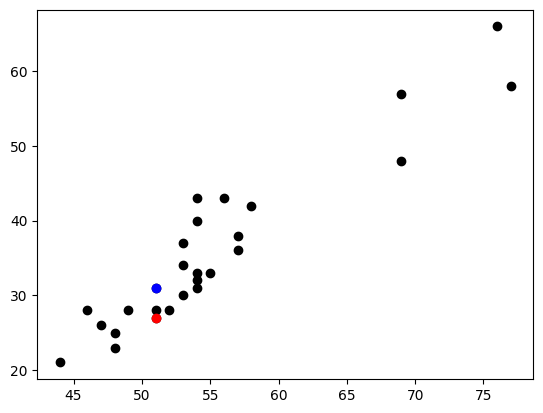

In [44]:
plt.style.use('default')

# All High Schools - School Climate vs. Rigor Expectations Score
plt.scatter(df['Rigorous Expectations'],
            df['School Climate'],
            c='black')
plt.scatter(colonial_hs['Rigorous Expectations'],
            colonial_hs['School Climate'],
            c='red',
            label='Colonial High')
plt.scatter(colonial_hs['Rigorous Expectations'],
            lake_nona_high['School Climate'],
            c='blue',
            label='Lake Nona High')
plt.scatter(df_district2['AverageRigor'],
            df_district2['AverageSchoolClimate'],
            color='grey',
            label='Average - All Schools')
plt.scatter(df_district2['AverageRigorNoD2'],
            df_district2['AverageSchoolClimateNoD2'],
            color='tan',
            label='Average - Without D2')
plt.title('School Climate vs. Rigorous Expectations Score - All High Schools')
plt.xlabel('Rigorous Expectations Score')
plt.ylabel('School Climate Score')
plt.xlim(20, 80)
plt.ylim(20, 80)
plt.legend()
plt.show()
